In [114]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [115]:
df = pd.read_csv('all_leela_chess_games.csv')
df.drop(['Event','Site','Date','Round','White','Black', 'GameEndTime','GameStartTime'], axis=1, inplace=True)

In [116]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [117]:
df = df[df['Result'] != '*']

In [118]:
df['Opening'] = df['Opening'].replace("Queen's Gambit declined", "Queen's gambit declined")
df['Opening'] = df['Opening'].replace("Queen's Gambit accepted", "Queen's gambit accepted")
df['Opening'] = df['Opening'].replace("Reti", "Reti Opening")
df['Result'] = df['Result'].replace("1-0", "1")
df['Result'] = df['Result'].replace("0-1", "0")
df['Result'] = df['Result'].replace("1/2-1/2", "0.5")
df['GameDuration'] = df['GameDuration'].replace("00:00:04", "4")
df['GameDuration'] = df['GameDuration'].replace("00:00:03", "3")
df['GameDuration'] = df['GameDuration'].replace("00:00:01", "1")
df['GameDuration'] = df['GameDuration'].replace("00:00:02", "2")
df['GameDuration'] = df['GameDuration'].replace("00:00:00", "0")
df['GameDuration'] = df['GameDuration'].replace("00:00:05", "5")
df['GameDuration'] = df['GameDuration'].replace("00:00:06", "6")
df['GameDuration'] = df['GameDuration'].replace("00:00:07", "7")
df['GameDuration'] = df['GameDuration'].replace("00:00:08", "8")
df['GameDuration'] = df['GameDuration'].replace("00:00:09", "9")

In [119]:
df.isnull().sum()

Result          0
ECO             0
GameDuration    0
Opening         0
PlyCount        0
TimeControl     0
Variation       0
Moves           0
dtype: int64

In [120]:
pd.set_option('display.max_rows', None)
for i in df.columns:
    print(i, df[i].unique())

Result ['1' '0' '0.5']
ECO ['C43' 'E60' 'A50' 'D55' 'D53' 'D39' 'B23' 'B50' 'D10' 'D59' 'D30' 'D60'
 'D38' 'B20' 'D22' 'D25' 'D20' 'A07' 'A06' 'D21' 'D02' 'D23' 'D15' 'A46'
 'D12' 'D27' 'D31' 'D26' 'C50' 'A45' 'D11' 'A05' 'E00' 'C53' 'E10' 'A08'
 'A00' 'C80' 'C77' 'A04' 'C78' 'C67' 'D35' 'C70' 'D58' 'E15' 'C83' 'C88'
 'C42' 'D50' 'E11' 'D85' 'E01' 'E03' 'E04' 'C92' 'C89' 'D36']
GameDuration ['4' '3' '1' '2' '0' '5' '6' '7' '8' '9']
Opening ['Petrov' "King's Indian, 3.Nf3" "Queen's pawn game"
 "Queen's gambit declined" "King's Indian defense" 'Sicilian'
 "Queen's gambit accepted" 'QGA, 4.e3' 'Reti Opening'
 "Queen's Bishop game" 'Giuoco Piano' 'Giuoco Pianissimo'
 'Catalan Opening' "Van't Kruijs Opening" 'Ruy Lopez' "Benko's Opening"
 "Queen's Indian" 'Bogo-Indian defense' 'Gruenfeld'
 'Bogo-Indian defense, Gruenfeld variation' 'Catalan']
PlyCount [115 108  62 110 166 123 155  86 104 130 148 168 163 114  81  82 120  70
 129 152 124  95  61 113 125 103 167  97 151  90  43 159 109  87  91

In [121]:
pd.set_option('display.max_rows', None)

# Assuming 'data' is your DataFrame and 'ECO' is the column you are working with
print(df['Result'].value_counts())
print(df['ECO'].value_counts())
print(df['GameDuration'].value_counts())
print(df['Opening'].value_counts())
print(df['Variation'].value_counts())

Result
1      914192
0      836630
0.5    754099
Name: count, dtype: int64
ECO
C43    700123
D10    647070
A50    518624
D20    276113
D22    173321
D25     63235
D21     52157
A06     21109
D23     11172
E10      7356
D02      6610
E60      5328
E15      5122
D30      4537
C78      3725
D38      2880
A46      2194
D55      1364
C67       735
D15       483
E00       312
D53       235
E11       218
D12       111
D31       110
D35       103
C70        91
D59        86
C42        72
D39        48
A07        38
C83        34
B50        30
B23        24
B20        23
D60        23
D26        18
A45        17
D27         9
E01         9
A05         8
D58         7
C50         6
C92         5
D36         4
E03         3
E04         3
D85         3
A00         2
C77         2
A08         2
C80         1
D11         1
C53         1
A04         1
C88         1
D50         1
C89         1
Name: count, dtype: int64
GameDuration
4    823350
3    758051
6    354703
2    225875
5    223188
7     7433

In [122]:
df.shape

(2504921, 8)

In [123]:
df.head()

,Result,ECO,GameDuration,Opening,PlyCount,TimeControl,Variation,Moves
0,1,C43,4,Petrov,115,1.0,"Modern attack, Symmetrical variation",e4 e5 Nf3 Nf6 d4 Nxe4 Bd3 d5 Nxe5 Nd7 Nc3 Bb4 ...
1,0,C43,4,Petrov,108,1.0,"Modern attack, Symmetrical variation",e4 e5 Nf3 Nf6 d4 Nxe4 Bd3 d5 Nxe5 Nd7 Nc3 Nxe5...
2,0.5,C43,3,Petrov,62,1.0,"Modern attack, Symmetrical variation",e4 e5 Nf3 Nf6 d4 Nxe4 Bd3 d5 Nxe5 Nd7 Nc3 Bb4 ...
3,0,C43,1,Petrov,110,1.0,"Modern attack, Symmetrical variation",e4 e5 Nf3 Nf6 d4 Nxe4 Bd3 d5 Nxe5 Nd7 Nxd7 Bxd...
4,0,C43,2,Petrov,166,1.0,"Modern attack, Symmetrical variation",e4 e5 Nf3 Nf6 d4 Nxe4 Bd3 d5 Nxe5 Nd7 Nc3 Bb4 ...


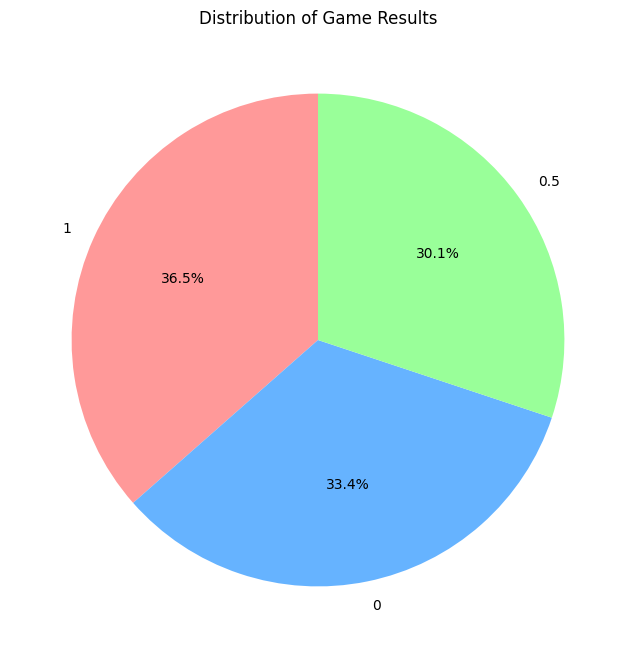

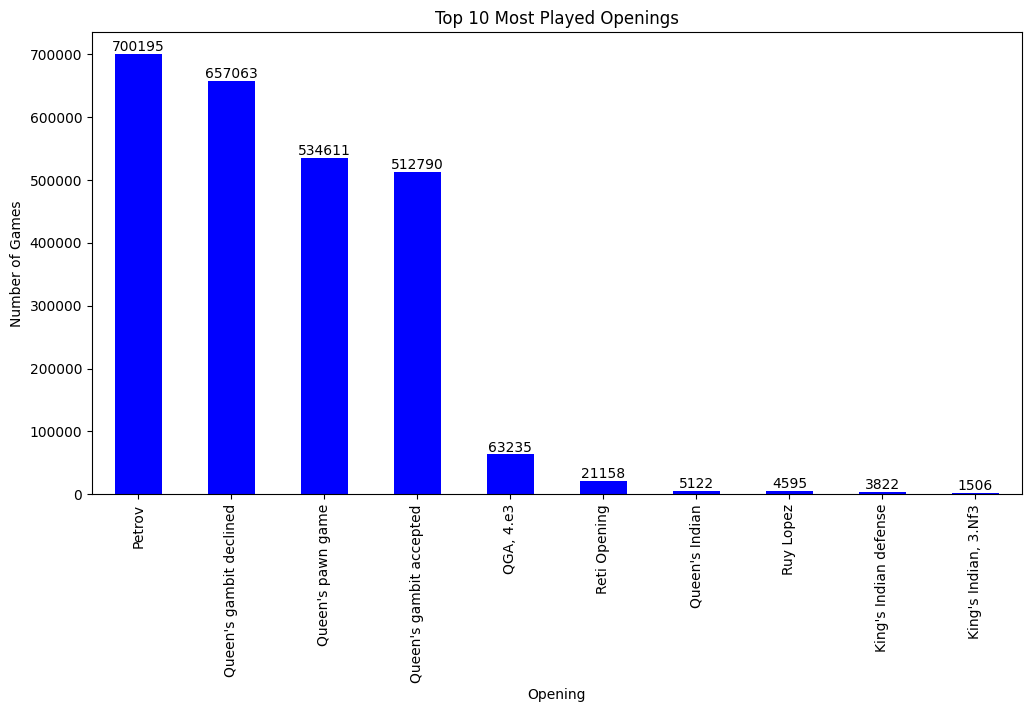

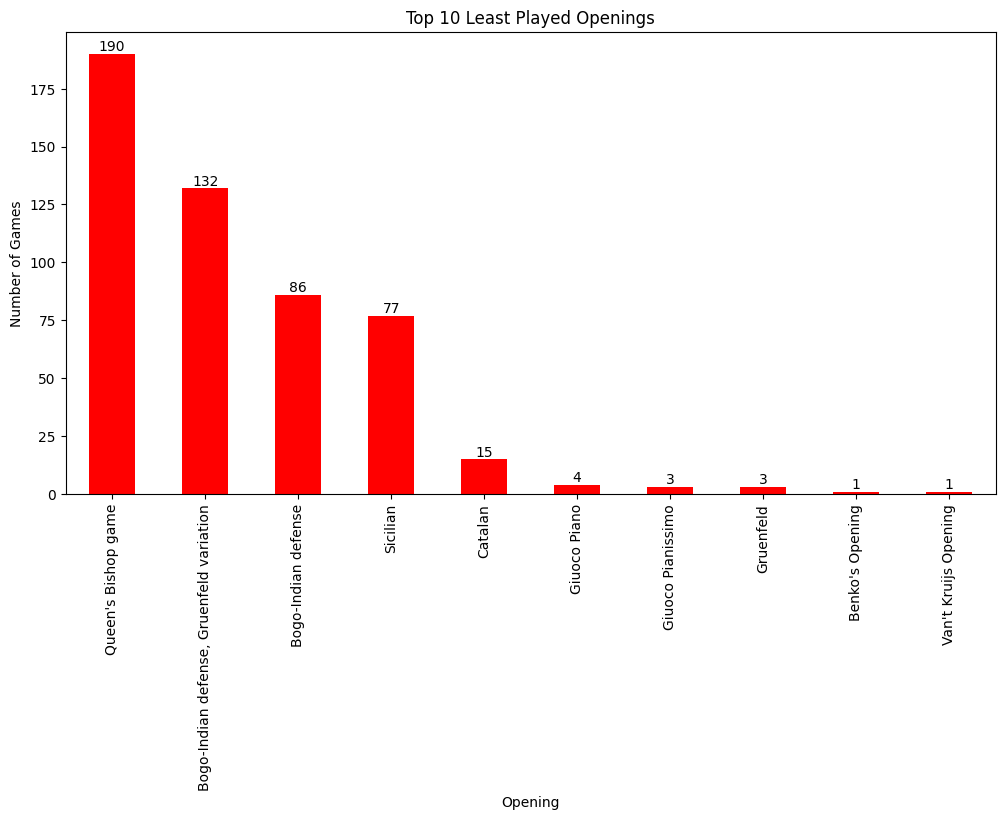

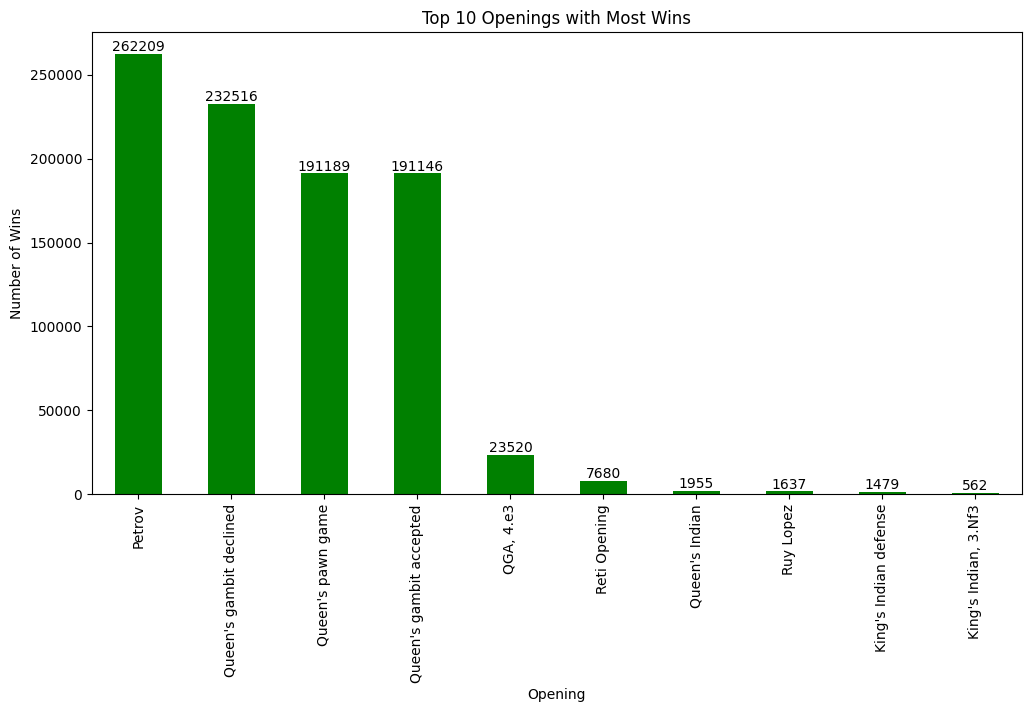

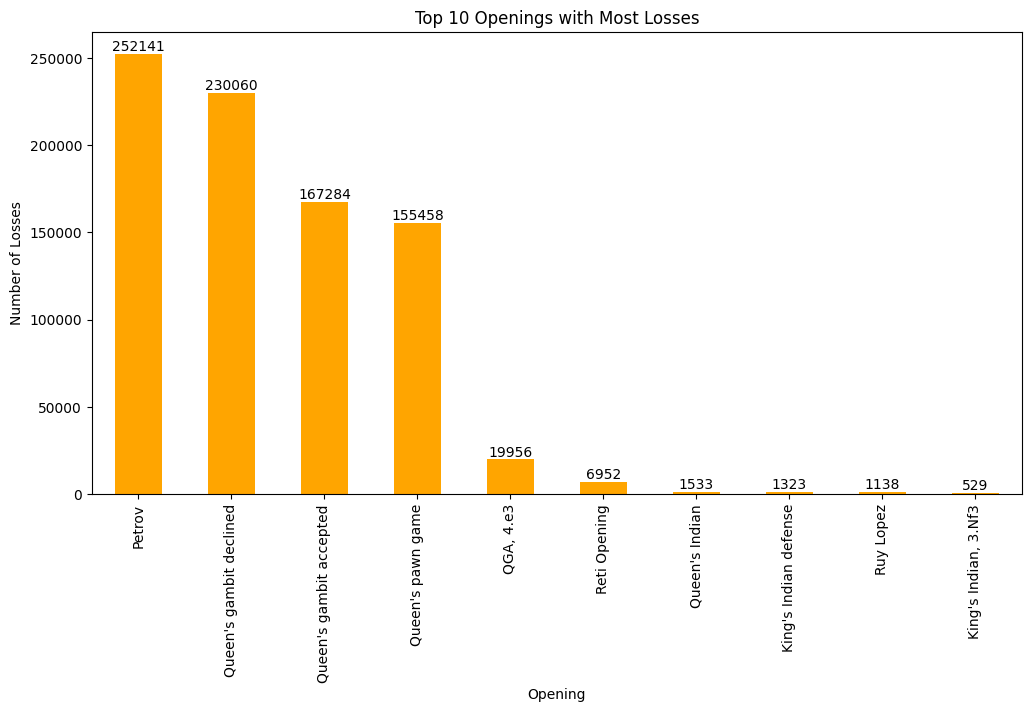

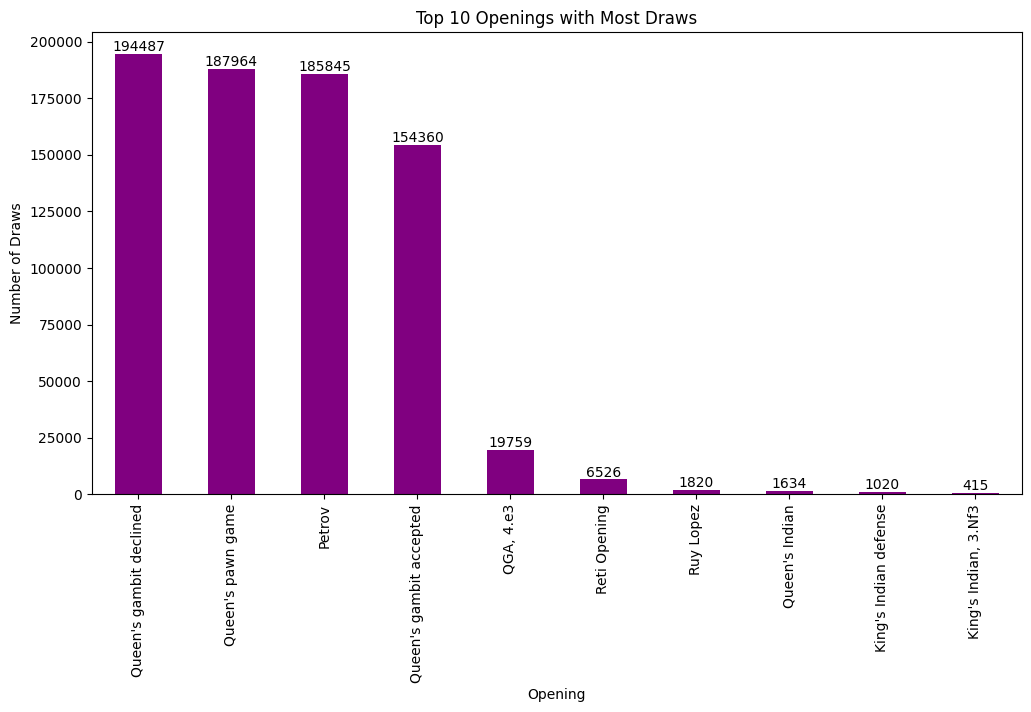

In [124]:
# 1. Distribution of Game Results
result_counts = df['Result'].value_counts()
plt.figure(figsize=(8, 8))
result_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Game Results')
plt.ylabel('')
plt.show()

# 2. Most Played Openings
opening_counts = df['Opening'].value_counts()
most_played_openings = opening_counts.head(10)
plt.figure(figsize=(12, 6))
ax = most_played_openings.plot(kind='bar', color='blue')  # ← This returns the Axes object
ax.bar_label(ax.containers[0])
plt.title('Top 10 Most Played Openings')
plt.xlabel('Opening')
plt.ylabel('Number of Games')
plt.show()

# 3. Least Played Openings
least_played_openings = opening_counts.tail(10)
plt.figure(figsize=(12, 6))
ax = least_played_openings.plot(kind='bar', color='red')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Least Played Openings')
plt.xlabel('Opening')
plt.ylabel('Number of Games')
plt.show()

# 4. No of win by Opening
win_counts = df[df['Result'] == '1']['Opening'].value_counts()
plt.figure(figsize=(12, 6))
ax = win_counts.head(10).plot(kind='bar', color='green')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Openings with Most Wins')
plt.xlabel('Opening')
plt.ylabel('Number of Wins')
plt.show()

# 5. no of loss by Opening
loss_counts = df[df['Result'] == '0']['Opening'].value_counts()
plt.figure(figsize=(12, 6))
ax = loss_counts.head(10).plot(kind='bar', color='orange')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Openings with Most Losses')
plt.xlabel('Opening')
plt.ylabel('Number of Losses')
plt.show()

# 6. Draw Rate by Opening
draw_counts = df[df['Result'] == '0.5']['Opening'].value_counts()
plt.figure(figsize=(12, 6))
ax = draw_counts.head(10).plot(kind='bar', color='purple')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Openings with Most Draws')
plt.xlabel('Opening')
plt.ylabel('Number of Draws')
plt.show()

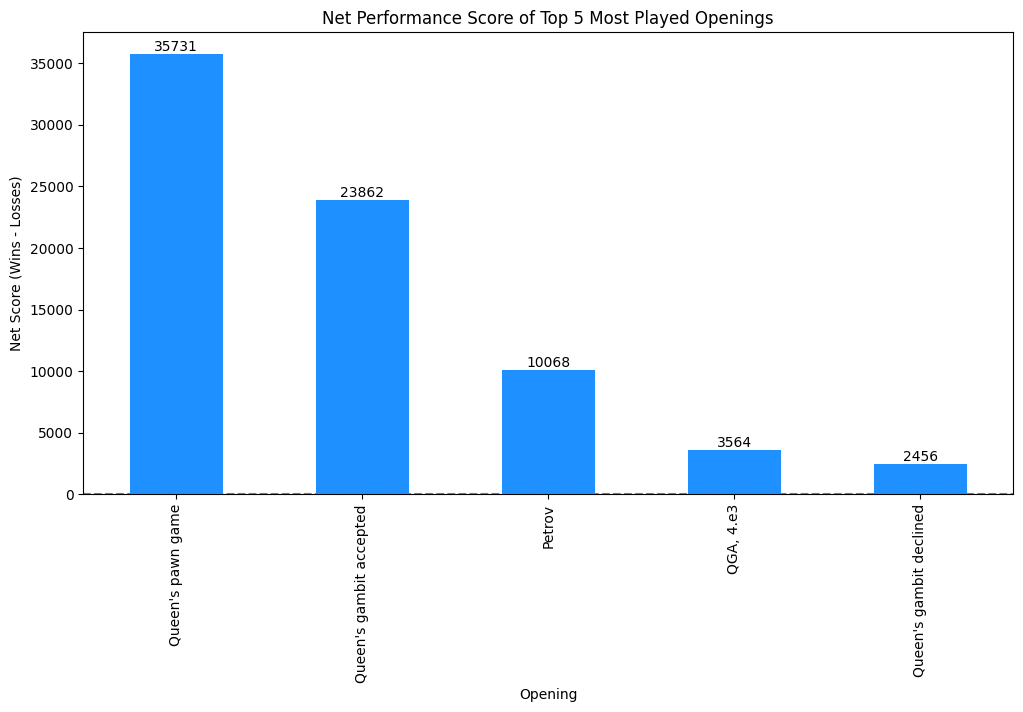

In [125]:
# Convert results to numeric scores
result_map = {'1': 1, '0.5': 0, '0': -1}
df['Score'] = df['Result'].map(result_map)

# Group by opening and sum the score
net_score = df.groupby('Opening')['Score'].sum()

# Get top 10 most played openings
top_openings = opening_counts.head(5).index

# Filter net scores for top openings
net_score_top = net_score[top_openings].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = net_score_top.plot(kind='bar', color='dodgerblue')
ax.bar_label(ax.containers[0])
plt.title('Net Performance Score of Top 5 Most Played Openings')
plt.xlabel('Opening')
plt.ylabel('Net Score (Wins - Losses)')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


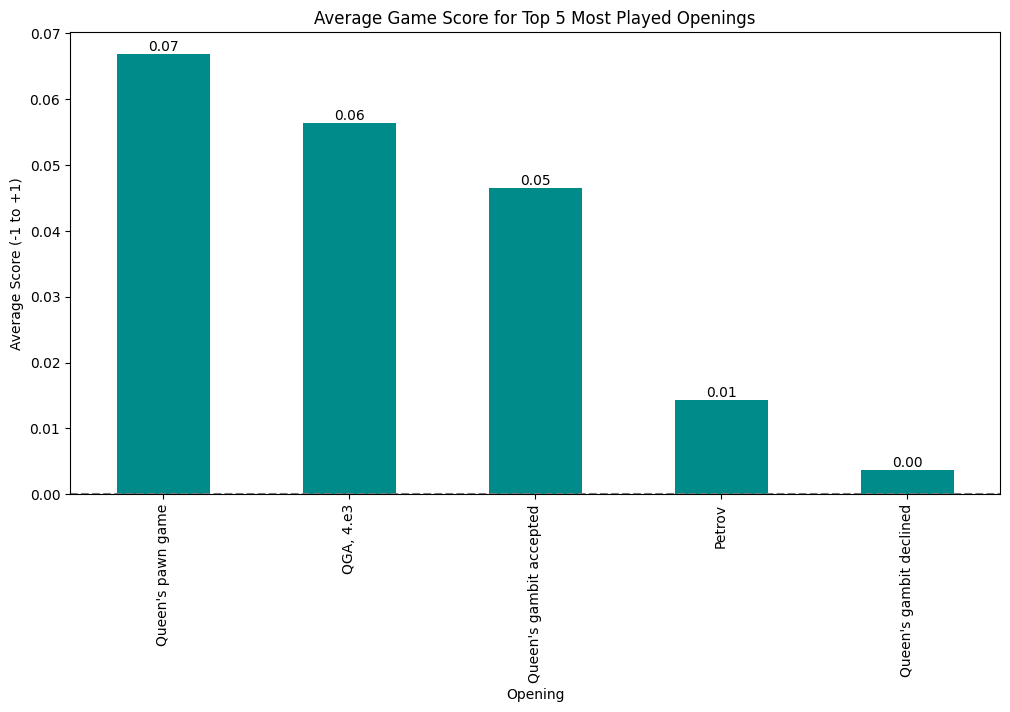

In [126]:
# Mean score per opening
mean_score = df.groupby('Opening')['Score'].mean()

# Filter for top openings
mean_score_top = mean_score[top_openings].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
ax = mean_score_top.plot(kind='bar', color='darkcyan')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Game Score for Top 5 Most Played Openings')
plt.xlabel('Opening')
plt.ylabel('Average Score (-1 to +1)')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


In [127]:
result_map = {'1': 1, '0.5': 0, '0': -1}
df['Score'] = df['Result'].map(result_map)
eco_counts = df['ECO'].value_counts()
top_eco = eco_counts.head(5).index


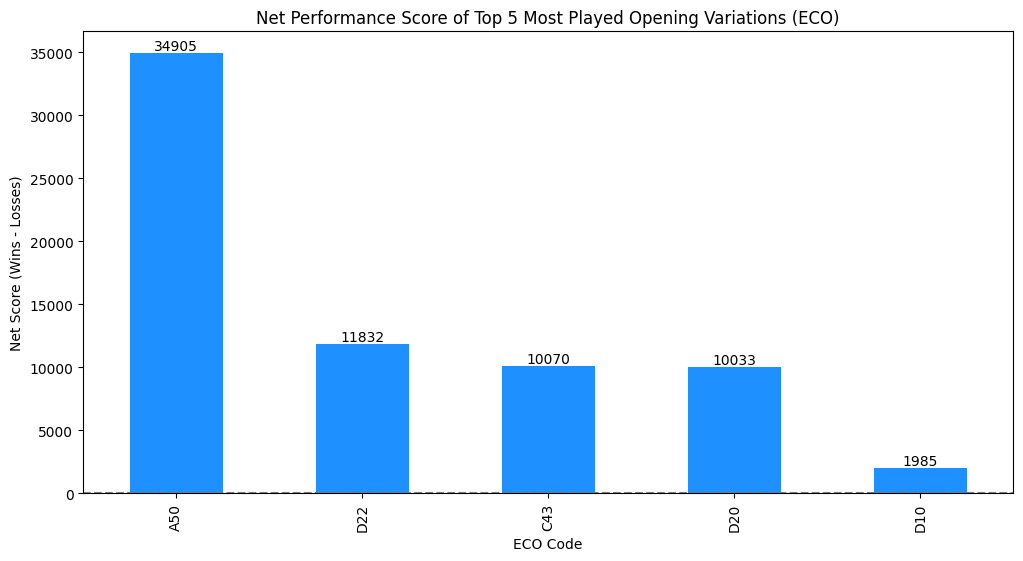

In [128]:
net_score_eco = df.groupby('ECO')['Score'].sum()
net_score_eco_top = net_score_eco[top_eco].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = net_score_eco_top.plot(kind='bar', color='dodgerblue')
ax.bar_label(ax.containers[0])
plt.title('Net Performance Score of Top 5 Most Played Opening Variations (ECO)')
plt.xlabel('ECO Code')
plt.ylabel('Net Score (Wins - Losses)')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


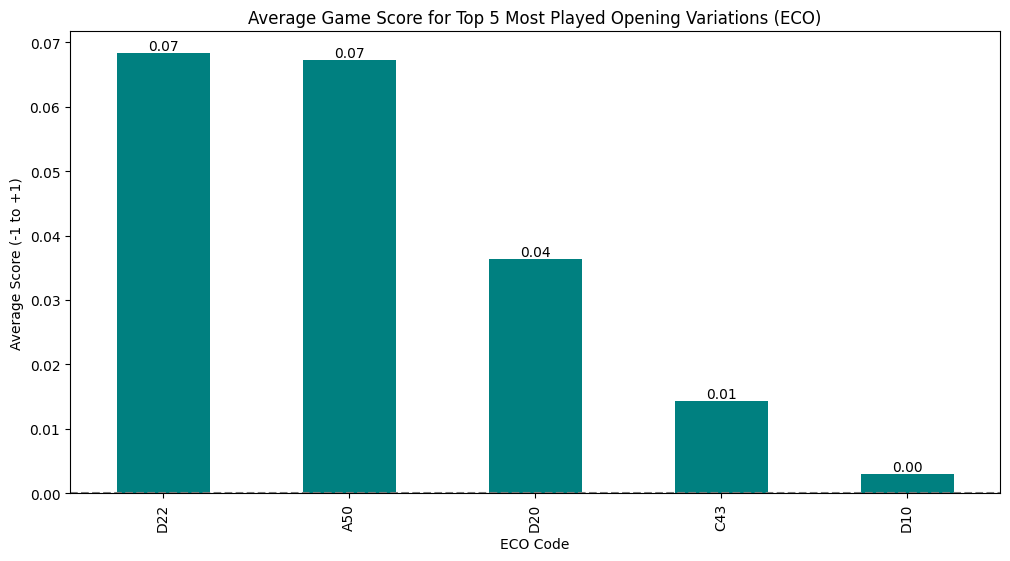

In [129]:
mean_score_eco = df.groupby('ECO')['Score'].mean()
mean_score_eco_top = mean_score_eco[top_eco].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = mean_score_eco_top.plot(kind='bar', color='teal')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Average Game Score for Top 5 Most Played Opening Variations (ECO)')
plt.xlabel('ECO Code')
plt.ylabel('Average Score (-1 to +1)')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


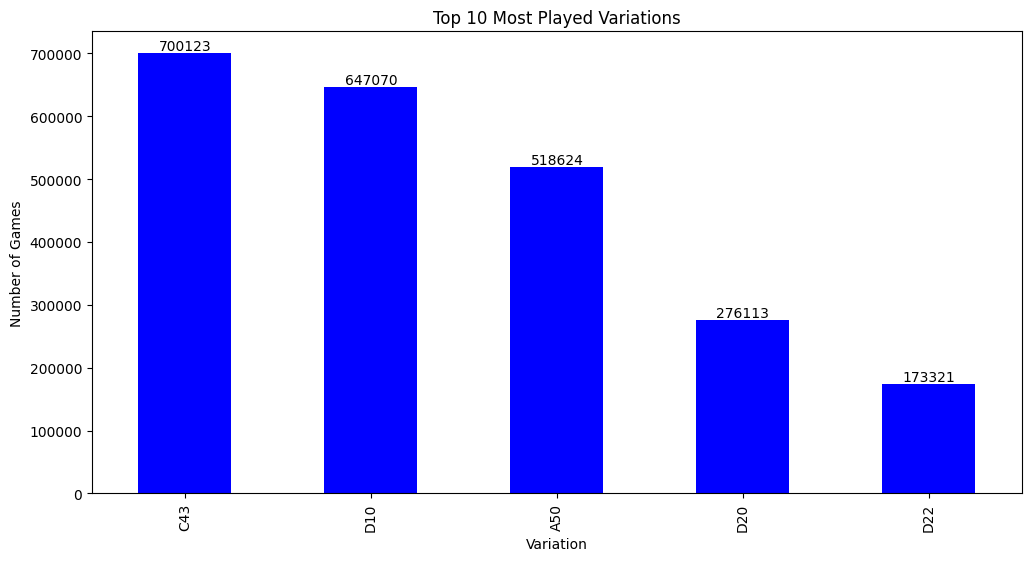

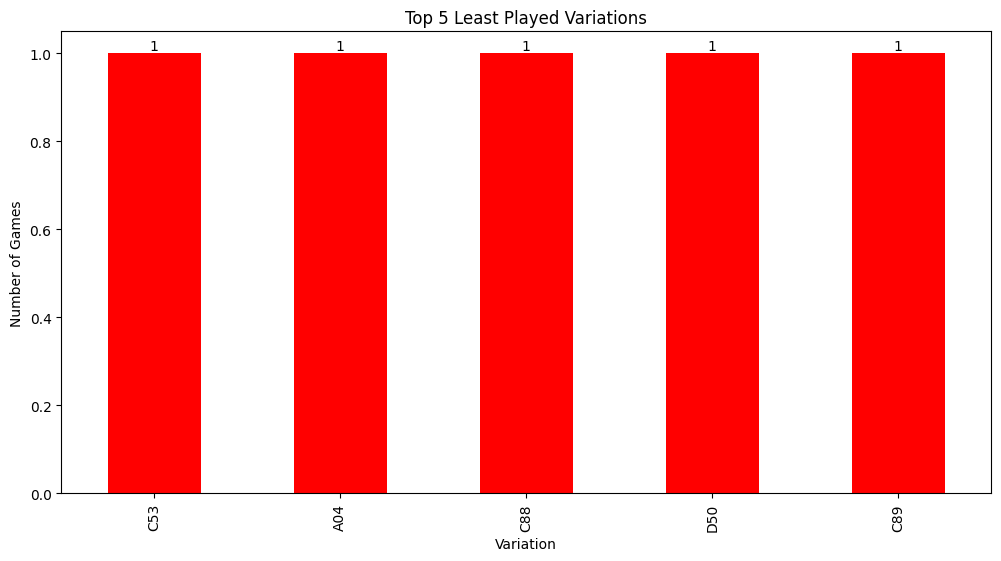

In [130]:
# Replace 'Unknown' variations with the corresponding ECO code
df['Variation'] = df.apply(lambda row: row['ECO'] if row['Variation'] == 'Unknown' else row['Variation'], axis=1)

# 2. Most Played Variations
variation_counts = df['ECO'].value_counts()
most_played_variations = variation_counts.head(5)
plt.figure(figsize=(12, 6))
ax = most_played_variations.plot(kind='bar', color='blue')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Most Played Variations')
plt.xlabel('Variation')
plt.ylabel('Number of Games')
plt.show()

# 3. Least Played Variations
least_played_variations = variation_counts.tail(5)
plt.figure(figsize=(12, 6))
ax = least_played_variations.plot(kind='bar', color='red')
ax.bar_label(ax.containers[0])
plt.title('Top 5 Least Played Variations')
plt.xlabel('Variation')
plt.ylabel('Number of Games')
plt.show()

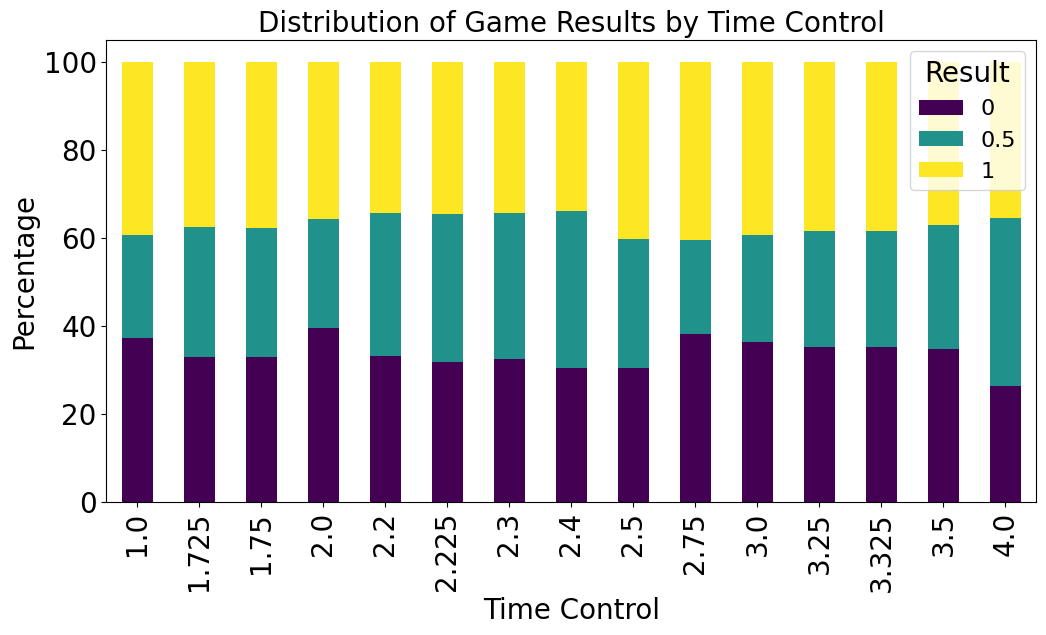

In [160]:
# Distribution of game results by time control
time_control_result_counts = df.groupby('TimeControl')['Result'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot the distribution of game results by time control
time_control_result_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribution of Game Results by Time Control', fontsize = 20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlabel('Time Control', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.legend(title='Result', fontsize = 16)
plt.show()

In [132]:
# Convert 'GameDuration' to numeric, coercing errors to NaN
df['GameDuration'] = pd.to_numeric(df['GameDuration'], errors='coerce')

# Drop rows with NaN values in 'GameDuration' if any
df = df.dropna(subset=['GameDuration'])

# Analyze the relationship between game duration and game results
game_duration_result = df.groupby('Result')['GameDuration'].describe()

# Display the summary statistics
print(game_duration_result)

           count      mean       std  min  25%  50%  75%  max
Result                                                       
0       836630.0  3.987629  1.329626  0.0  3.0  4.0  5.0  9.0
0.5     754099.0  3.843778  1.316221  0.0  3.0  4.0  4.0  9.0
1       914192.0  3.958388  1.324376  0.0  3.0  4.0  5.0  9.0


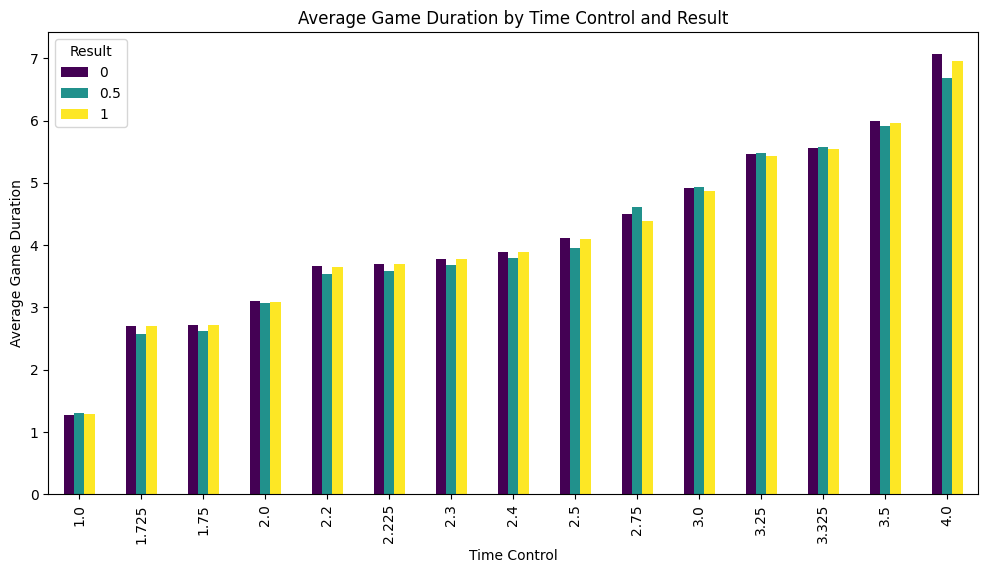

In [133]:
# Analyze the combined impact of GameDurations and TimeControl on game results
combined_analysis = df.groupby(['TimeControl', 'Result'])['GameDuration'].mean().unstack().fillna(0)

# Plot the combined analysis
combined_analysis.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Game Duration by Time Control and Result')
plt.xlabel('Time Control')
plt.ylabel('Average Game Duration')
plt.legend(title='Result')
plt.show()

In [134]:
df_gm = pd.read_csv('elite_chess_games.csv')

In [135]:
df_gm.drop(['Event','Site','Date','Round','White','Black', 'GameEndTime','GameStartTime'], axis=1, inplace=True)

In [136]:
df_gm.dropna(inplace=True)
df_gm.drop_duplicates(inplace=True)

In [137]:
pd.set_option('display.max_rows', None)

print(df_gm['Result'].value_counts())
print(df_gm['ECO'].value_counts())
print(df_gm['GameDuration'].value_counts())
print(df_gm['Opening'].value_counts())
print(df_gm['Variation'].value_counts())

Result
1-0        766954
0-1        682235
1/2-1/2    195852
Name: count, dtype: int64
ECO
A45    40456
A00    38854
D02    35244
B00    34657
A05    34165
B12    33736
A04    32456
A40    31952
B06    28598
B40    27399
B01    27027
A01    25976
C00    24398
A46    24096
B10    23596
D00    23430
B23    23315
B90    21409
B22    21241
B30    20859
D01    17439
C02    17199
A13    16063
A15    15692
B20    15183
A07    14414
D35    14392
C11    13780
D37    13537
B13    13295
A48    12842
C41    12304
B50    12301
A43    12054
A06    11458
B15    11215
C54    11061
A10    10343
D31    10326
E11     9921
C50     9908
C67     9771
D30     9746
C42     9622
D10     9578
C47     9502
B07     9396
B33     9256
A20     9245
D11     8884
B27     8816
A41     8759
B21     8528
C45     8276
C01     8150
B02     8080
C10     8027
A30     7998
B32     7946
B31     7764
E05     7528
B52     7301
B51     7070
B03     6878
D38     6871
D15     6812
E10     6099
A08     5879
E60     5806
D85     5806

In [138]:
pd.set_option('display.max_rows', None)
for i in df_gm.columns:
    print(i, df[i].unique())

Result ['1' '0' '0.5']
ECO ['C43' 'E60' 'A50' 'D55' 'D53' 'D39' 'B23' 'B50' 'D10' 'D59' 'D30' 'D60'
 'D38' 'B20' 'D22' 'D25' 'D20' 'A07' 'A06' 'D21' 'D02' 'D23' 'D15' 'A46'
 'D12' 'D27' 'D31' 'D26' 'C50' 'A45' 'D11' 'A05' 'E00' 'C53' 'E10' 'A08'
 'A00' 'C80' 'C77' 'A04' 'C78' 'C67' 'D35' 'C70' 'D58' 'E15' 'C83' 'C88'
 'C42' 'D50' 'E11' 'D85' 'E01' 'E03' 'E04' 'C92' 'C89' 'D36']
GameDuration [4 3 1 2 0 5 6 7 8 9]
Opening ['Petrov' "King's Indian, 3.Nf3" "Queen's pawn game"
 "Queen's gambit declined" "King's Indian defense" 'Sicilian'
 "Queen's gambit accepted" 'QGA, 4.e3' 'Reti Opening'
 "Queen's Bishop game" 'Giuoco Piano' 'Giuoco Pianissimo'
 'Catalan Opening' "Van't Kruijs Opening" 'Ruy Lopez' "Benko's Opening"
 "Queen's Indian" 'Bogo-Indian defense' 'Gruenfeld'
 'Bogo-Indian defense, Gruenfeld variation' 'Catalan']
PlyCount [115 108  62 110 166 123 155  86 104 130 148 168 163 114  81  82 120  70
 129 152 124  95  61 113 125 103 167  97 151  90  43 159 109  87  91 164
 116  96 146 14

In [139]:
df_gm['Result'] = df_gm['Result'].replace({'1-0': '1', '0-1': '0', '1/2-1/2': '0.5'})

In [140]:
df_gm.head()

,Result,ECO,GameDuration,Opening,PlyCount,TimeControl,Variation,Moves
0,0,C11,Unknown,"French Defense: Classical Variation, Steinitz ...",Unknown,180+0,Unknown,e4 e6 d4 d5 Nc3 Nf6 e5 Nfd7 Nce2 c5 c3 Nc6 f4 ...
1,1,B20,Unknown,"Sicilian Defense: Wing Gambit, Marshall Variation",Unknown,180+2,Unknown,e4 c5 b4 cxb4 a3 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd...
2,0,A41,Unknown,"Rat Defense: English Rat, Lisbon Gambit",Unknown,180+0,Unknown,d4 d6 c4 e5 dxe5 Nc6 exd6 Bxd6 Nc3 Nf6 Nf3 Bg4...
3,1,C70,Unknown,"Ruy Lopez: Morphy Defense, Norwegian Variation",Unknown,180+0,Unknown,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 b5 Bb3 Na5 d4 exd4 Qx...
4,1,B00,Unknown,Barnes Defense,Unknown,180+0,Unknown,e4 f6 d4 g6 h4 Nh6 h5 g5 f4 g4 f5 d5 Bd3 dxe4 ...


In [141]:
df_gm.isnull().sum()

Result          0
ECO             0
GameDuration    0
Opening         0
PlyCount        0
TimeControl     0
Variation       0
Moves           0
dtype: int64

In [142]:
df_gm.shape

(1645041, 8)

<Axes: title={'center': 'Leela vs Elite Players Win Rate by Opening'}, xlabel='ECO'>

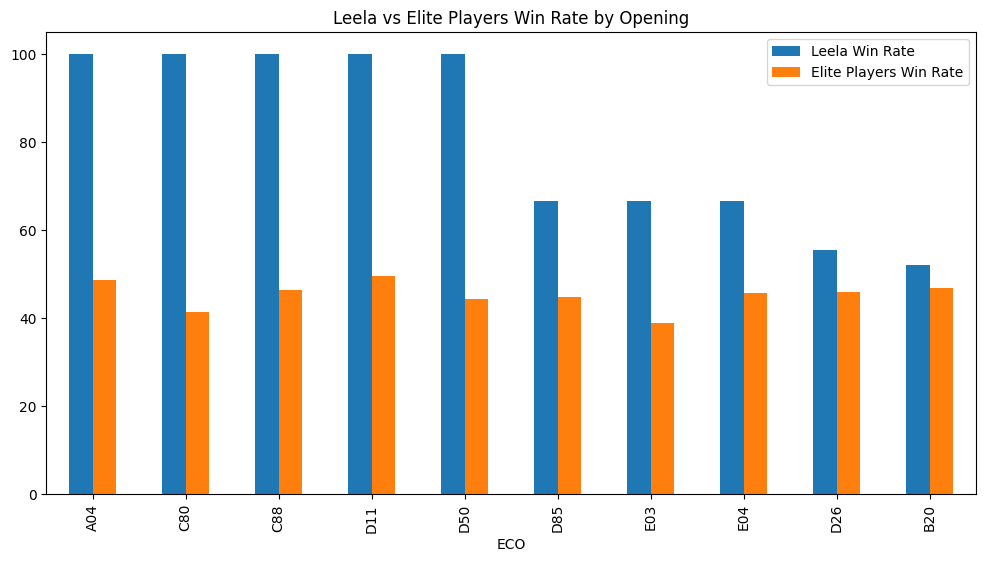

In [143]:
common_openings = set(df['ECO']).intersection(df_gm['ECO'])

def get_win_rate(df):
    return df[df['Result'] == '1']['ECO'].value_counts() / df['ECO'].value_counts() * 100

leela_wr = get_win_rate(df[df['ECO'].isin(common_openings)])
gm_wr = get_win_rate(df_gm[df_gm['ECO'].isin(common_openings)])

win_rate_comparison = pd.DataFrame({
    'Leela Win Rate': leela_wr,
    'Elite Players Win Rate': gm_wr
}).dropna().sort_values(by='Leela Win Rate', ascending=False)

win_rate_comparison.head(10).plot(kind='bar', figsize=(12, 6), title='Leela vs Elite Players Win Rate by Opening')


<Axes: title={'center': 'Openings Leela Uses More Than Elite Players'}, xlabel='ECO'>

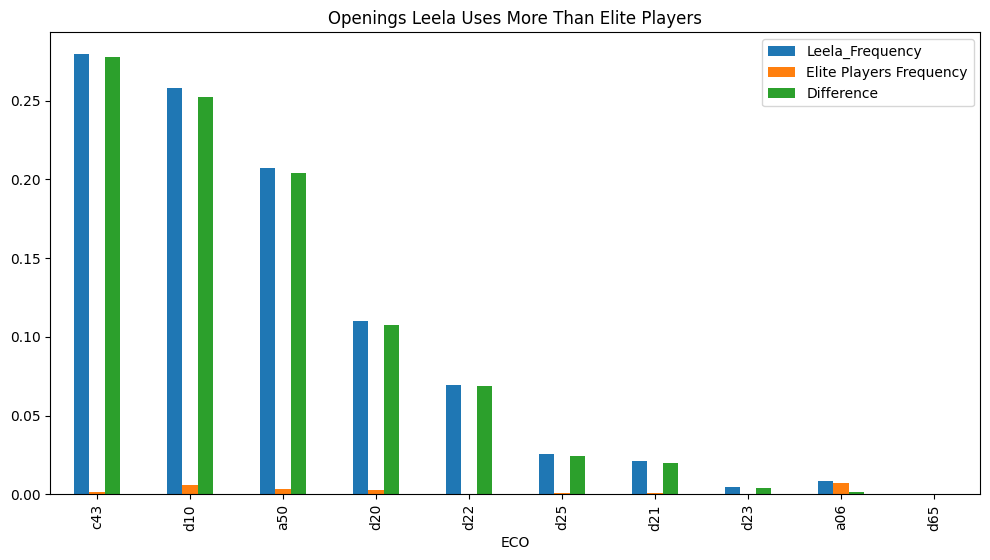

In [144]:
# Normalize opening names to lowercase for comparison
df['ECO'] = df['ECO'].str.lower()
df_gm['ECO'] = df_gm['ECO'].str.lower()

# Frequency of openings
leela_opening_freq = df['ECO'].value_counts(normalize=True)
gm_opening_freq = df_gm['ECO'].value_counts(normalize=True)

# Compare usage rates
opening_usage_compare = pd.DataFrame({
    'Leela_Frequency': leela_opening_freq,
    'Elite Players Frequency': gm_opening_freq
}).fillna(0)

# Highlight underused openings by GMs that Leela loves
opening_usage_compare['Difference'] = opening_usage_compare['Leela_Frequency'] - opening_usage_compare['Elite Players Frequency']
opening_usage_compare.sort_values(by='Difference', ascending=False).head(10).plot(kind='bar', figsize=(12, 6), title='Openings Leela Uses More Than Elite Players')


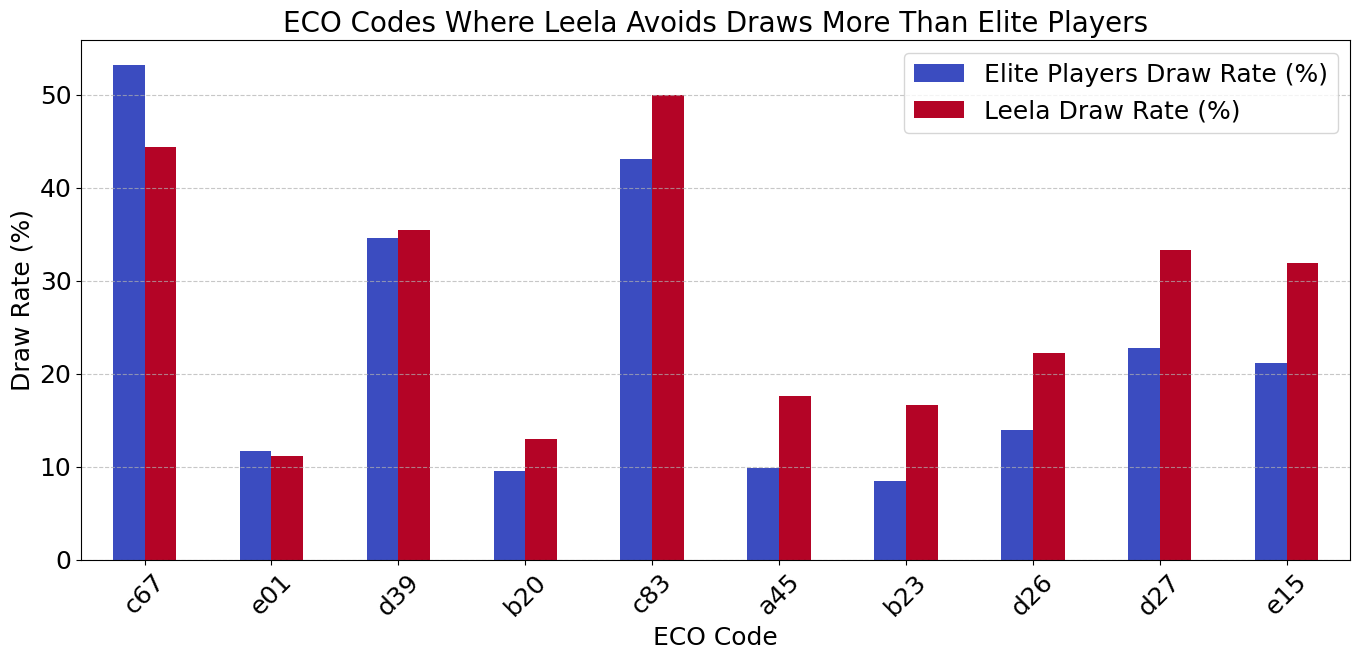

In [159]:
import matplotlib.pyplot as plt

def get_draw_rate(df):
    return df[df['Result'] == '0.5']['ECO'].value_counts() / df['ECO'].value_counts() * 100

# Compute draw rates
leela_draws = get_draw_rate(df)
gm_draws = get_draw_rate(df_gm)

# Compare and sort
draw_rate_compare = pd.DataFrame({
    'Leela Draw Rate (%)': leela_draws,
    'Elite Players Draw Rate (%)': gm_draws
}).dropna()

draw_rate_compare['DrawDiff'] = draw_rate_compare['Elite Players Draw Rate (%)'] - draw_rate_compare['Leela Draw Rate (%)']
top_diff = draw_rate_compare.sort_values(by='DrawDiff', ascending=False).head(10)

# Plot
ax = top_diff[['Elite Players Draw Rate (%)', 'Leela Draw Rate (%)']].plot(
    kind='bar', 
    figsize=(14, 7),
    fontsize=18,
    colormap='coolwarm'
)

# Styling
ax.set_title('ECO Codes Where Leela Avoids Draws More Than Elite Players', fontsize=20)
ax.set_xlabel('ECO Code', fontsize=18)
ax.set_ylabel('Draw Rate (%)', fontsize=18)
ax.tick_params(axis='x', labelsize=18, rotation=45)
ax.tick_params(axis='y', labelsize=18)
plt.legend(fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


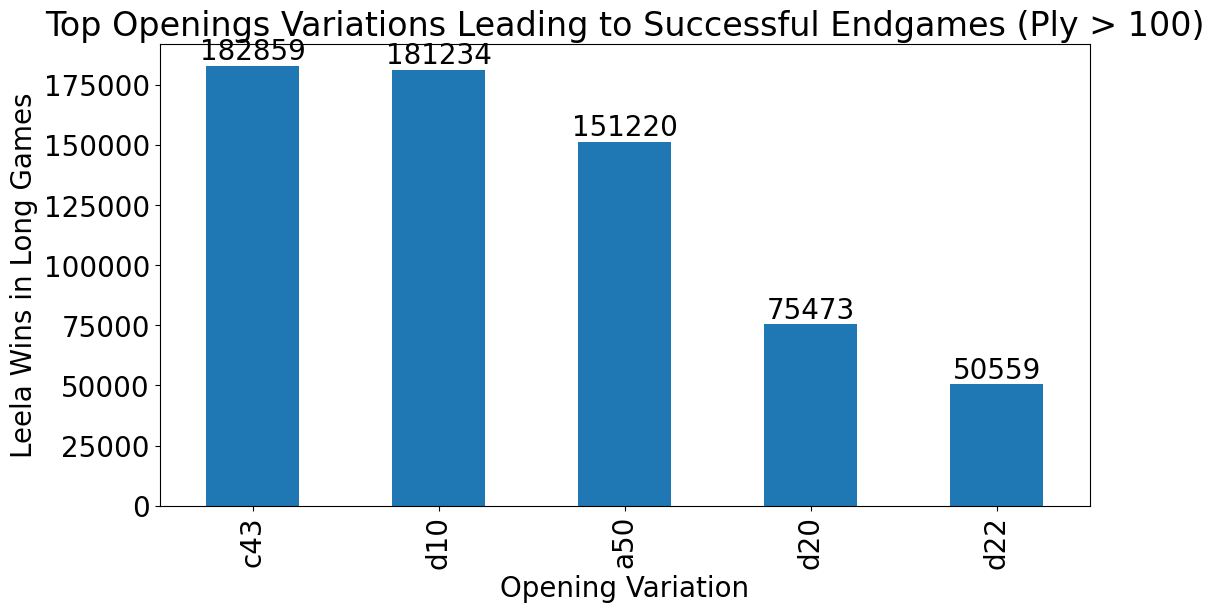

In [158]:
# Focus on long games (indicative of reaching endgame)
endgame_df = df[df['PlyCount'] > 100]

# See which openings tend to lead to favorable endgames for Leela
winning_endgames = endgame_df[endgame_df['Result'] == '1']['ECO'].value_counts().head(5)
plt.figure(figsize=(12, 6))
ax = winning_endgames.plot(kind='bar', title='Top Openings Variations Leading to Successful Endgames (Ply > 100)')
ax.bar_label(ax.containers[0])
plt.xlabel('Opening Variation')
plt.ylabel('Leela Wins in Long Games')
plt.show()


In [147]:
# Map result to score
result_map = {'1': 1, '0.5': 0, '0': -1}
df['Score'] = df['Result'].map(result_map)
df_gm['Score'] = df_gm['Result'].map(result_map)


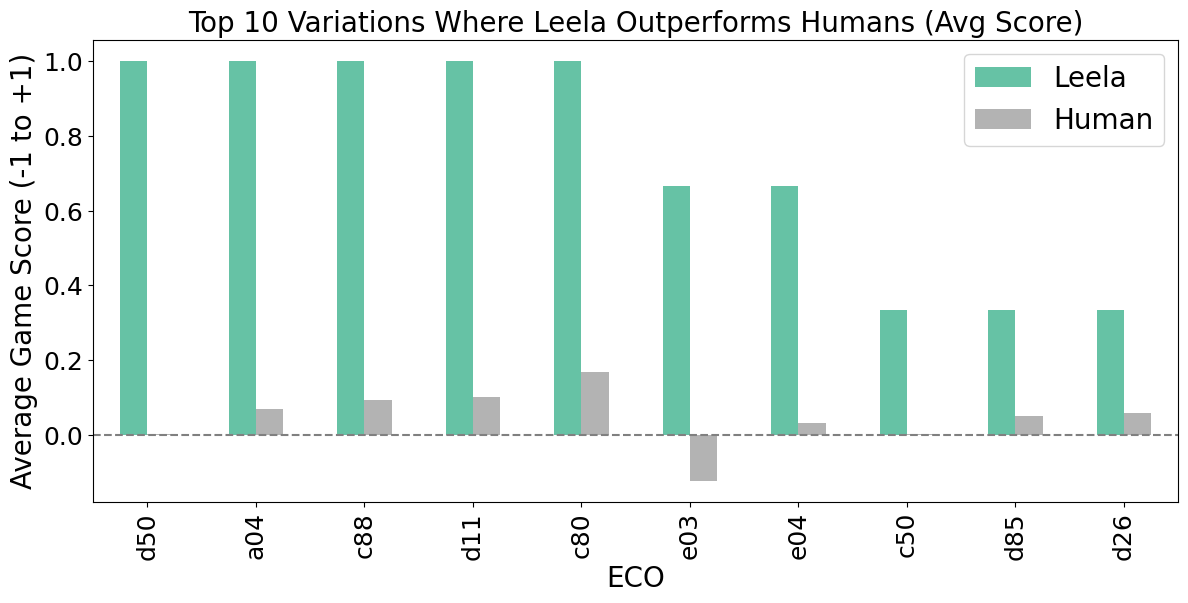

In [154]:
# Load and prep
result_map = {'1': 1, '0.5': 0, '0': -1}
df['Score'] = df['Result'].map(result_map)
df_gm['Score'] = df_gm['Result'].map(result_map)

# Group by ECO
leela_eco_score = df.groupby('ECO')['Score'].mean()
human_eco_score = df_gm.groupby('ECO')['Score'].mean()

# Filter to common ECOs
common_eco = leela_eco_score.index.intersection(human_eco_score.index)

# Combine
eco_compare = pd.DataFrame({
    'Leela': leela_eco_score[common_eco],
    'Human': human_eco_score[common_eco]
})
eco_compare['Leela Advantage'] = eco_compare['Leela'] - eco_compare['Human']
eco_compare = eco_compare.sort_values('Leela Advantage', ascending=False).head(10)

# Plot
ax = eco_compare[['Leela', 'Human']].plot(kind='bar', figsize=(14,6), colormap='Set2')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.title('Top 10 Variations Where Leela Outperforms Humans (Avg Score)', fontsize=20)
plt.xlabel('ECO', fontsize=20)
plt.ylabel('Average Game Score (-1 to +1)', fontsize=20)
plt.axhline(0, color='gray', linestyle='--')
plt.show()


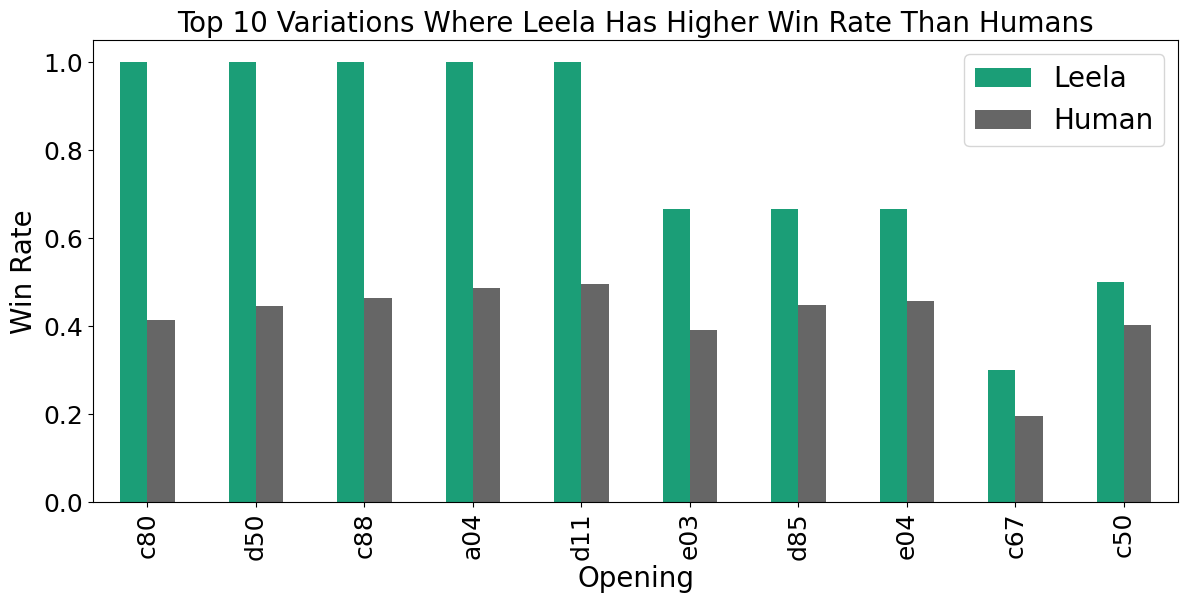

In [155]:
# Win rate = wins / total
leela_win_rate = df[df['Result'] == '1'].groupby('ECO').size() / df.groupby('ECO').size()
human_win_rate = df_gm[df_gm['Result'] == '1'].groupby('ECO').size() / df_gm.groupby('ECO').size()

common_opening = leela_win_rate.index.intersection(human_win_rate.index)

opening_compare = pd.DataFrame({
    'Leela': leela_win_rate[common_opening],
    'Human': human_win_rate[common_opening]
})
opening_compare['Leela Advantage'] = opening_compare['Leela'] - opening_compare['Human']
opening_compare = opening_compare.sort_values('Leela Advantage', ascending=False).head(10)

ax = opening_compare[['Leela', 'Human']].plot(kind='bar', figsize=(14,6), colormap='Dark2')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.title('Top 10 Variations Where Leela Has Higher Win Rate Than Humans', fontsize=20)
plt.xlabel('Opening', fontsize=20)
plt.ylabel('Win Rate', fontsize=20)
plt.show()
